## Reference 

https://financedata.github.io/posts/matplotlib-hangul-for-osx.html

# Python info check 

In [1]:
import platform
print(f"Platform is {platform.platform()}")

import sys
print(f"Version of python is {sys.version_info}")

import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

Platform is Linux-5.10.93-0-virt-aarch64-with-glibc2.31
Version of python is sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
버전:  3.4.3
설치위치:  /opt/conda/lib/python3.9/site-packages/matplotlib/__init__.py
설정:  /home/jovyan/.config/matplotlib
캐시:  /home/jovyan/.cache/matplotlib


# Example for wrong behavior

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

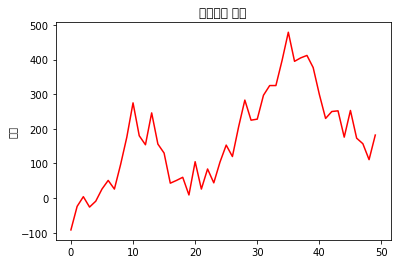

In [2]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

import matplotlib.pyplot as plt

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이')
plt.ylabel('가격')
plt.show()

# Finding info for font directory

- 폰트가 어느 위치에 있는지 파악한다. 
- 콘테이너 이미지를 통해서 OS 상에 한글 폰트가 심었다. 이게 어디 심어졌는지를 파악하는 과정 

In [4]:
import matplotlib
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
#[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumGothic Eco',
 'NanumMyeongjo',
 'NanumBarunpen',
 'NanumBarunGothic',
 'Nanum Pen Script',
 'NanumGothic',
 'NanumSquare',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumBarunpen',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumGothicCoding',
 'NanumGothic Eco',
 'NanumMyeongjo Eco',
 'NanumMyeongjo',
 'NanumGothic',
 'Nanum Brush Script',
 'NanumGothicCoding',
 'NanumSquare',
 'NanumMyeongjo Eco',
 'NanumGothic',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo Eco']

# Method 1: set font env per figure 

- 폰트의 위치와 여러가지 속성을 지정하고 해당 개체에 바로 부여하는 방식

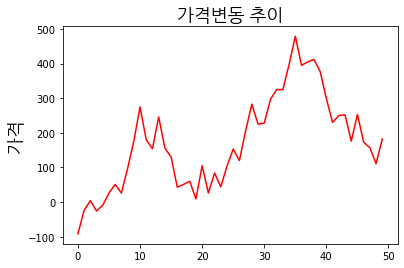

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()

# Method 2: set font env globally 

- 전체 속성을 부여함 
- 마이너스 부호가 깨지지 않게 만들기 위해 필요한 옵션 

`plt.rcParams['axes.unicode_minus'] = False` 

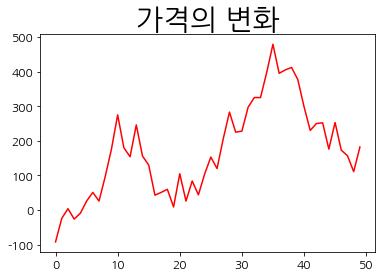

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['font.size'] = 24.
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 20.
plt.rcParams['axes.unicode_minus'] = False

plt.title('가격의 변화')
plt.plot(range(50), data, 'r')
plt.show()